In [37]:
#!git clone https://github.com/ultralytics/yolov5
# No longer needed, instead:
!git submodule update --init --recursive

1951.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [38]:
#!cd yolov5 & pip install -r requirements.txt
# No longer needed - all dependencies are meet in the Container Image

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from numpy import asarray

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', autoshape=False)

/opt/conda/lib/python3.10/site-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/user/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/user/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-6 Python-3.10.9 torch-2.0.0 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 16.0MB/s]



In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="zlr5RvicnuC2MDNQMjIy")
project = rf.workspace("newvariousproductdetection").project("productdetection-tuotc")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ProductDetection-4 in yolov5pytorch:: 100%|██████████| 1100/1100 [00:00<00:00, 3276.82it/s]


Detection with a model for one image

In [27]:
#img = 'C:\\Users\\Pati\\Desktop\\STUDIA_AIR\\III_rok\\VI_semestr\\Inzynierka\\ultralytics_yolov5\\yolov5\\data\\images\\zidane.jpg'
#img2 = 'C:\\Users\\Pati\\Desktop\\STUDIA_AIR\\III_rok\\VI_semestr\\Inzynierka\\ultralytics_yolov5\\yolov5\\ProductDetection-4\\train\\images\\VID-20231219-WA0003_mp4-5_jpg.rf.22c61a5334cbdfbd06da80b679458590.jpg'

In [34]:
results = model(img)

results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
results.pandas().xyxy[0] # im predictions (tensor)
#results.pandas().xyxy[1].value_counts('name')  # class counts (pandas)


AttributeError: 'str' object has no attribute 'shape'

In [43]:
xyxy = results.xyxy[0].numpy()
print(xyxy)

[[      108.1      307.05      235.17      509.34     0.85118          41]
 [     102.65      136.49      172.49      225.55     0.61286          68]
 [     461.56      66.922      639.17      490.63      0.5774          72]
 [     365.46      48.083      383.62      72.995     0.36034          40]
 [     3.3158      135.95      122.71      494.09     0.35875          72]
 [     577.38      254.37      639.45      474.98     0.30355          41]
 [     228.83      196.62      261.35      232.92     0.27365          41]
 [     93.553      52.488       110.2      71.574     0.26829          41]
 [     577.73       253.9      639.99      476.22      0.2616          39]
 [     259.95      26.463      346.66      519.11       0.251          72]]


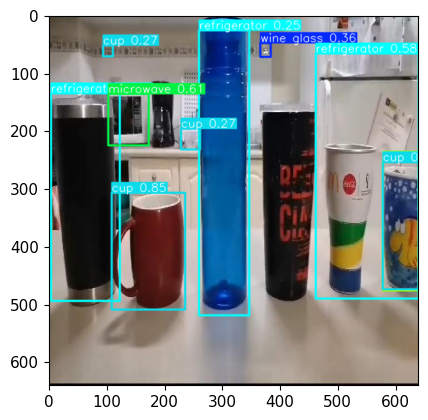

In [58]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
results.pandas().xywh[0]

,xcenter,ycenter,width,height,confidence,class,name
0,171.634033,408.197937,127.072029,202.292725,0.851176,41,cup
1,137.567734,181.020721,69.835480,89.067230,0.612862,68,microwave
2,550.366821,278.774109,177.606812,423.704468,0.577396,72,refrigerator
3,374.537262,60.539188,18.157043,24.912422,0.360335,40,wine glass
4,63.011200,315.017700,119.390747,358.139343,0.358755,72,refrigerator
5,608.416138,364.675293,62.062622,220.604187,0.303548,41,cup
6,245.093414,214.769424,32.519043,36.293976,0.273649,41,cup
7,101.874794,62.031059,16.642807,19.085644,0.268295,41,cup
8,608.857666,365.060791,62.262817,222.314270,0.261602,39,bottle
9,303.305756,272.788513,86.707703,492.651001,0.250997,72,refrigerator


In [52]:
image = Image.open('C:\\Users\\Pati\\Desktop\\STUDIA_AIR\\III_rok\\VI_semestr\\Inzynierka\\ultralytics_yolov5\\yolov5\\ProductDetection-4\\train\\images\\WhatsApp-Video-2023-12-19-at-18_03_10_75640777_mp4-5_jpg.rf.9a9a19ca80703141a96ed88339447be0.jpg')
print(image.format)
print(image.size)

numpy_img = asarray(image)
print(type(numpy_img))

JPEG
(640, 640)
<class 'numpy.ndarray'>


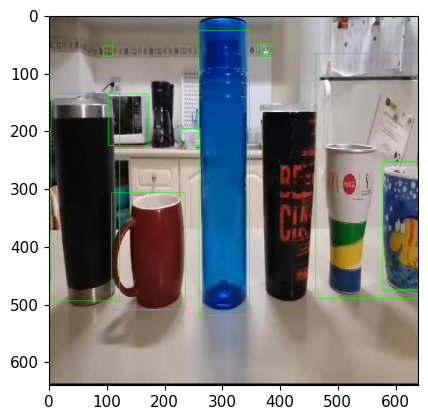

In [57]:
for ij in xyxy:
    cv2.rectangle(numpy_img, (int(ij[0]), int(ij[1])), (int(ij[2]), int(ij[3])), (0,255,0))

%matplotlib inline 
plt.imshow(numpy_img)
plt.show()

In [5]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Training

In [ ]:
#commend run in terminal
!python train.py --img 640 --batch 16 --epochs 25 --data tableobjects.yaml --weights yolov5s.pt

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp21/weights/best.pt --img 640 --conf 0.25 --source datasets/tableobjects/test/images/VID-20231219-WA0003_mp4-1_jpg.rf.3d1360229ba1e29089e6b169bcd5a31d.jpg

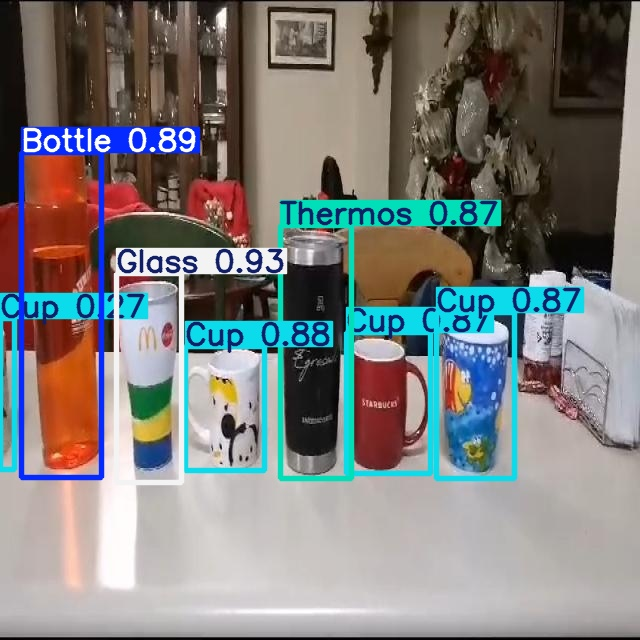

In [10]:
from IPython.display import Image, clear_output
Image(filename='yolov5/runs/detect/exp6/VID-20231219-WA0003_mp4-1_jpg.rf.3d1360229ba1e29089e6b169bcd5a31d.jpg', width=400)

In [44]:
model_trained = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp21/weights/best.pt')

detect_results = model_trained('datasets/tableobjects/test/images/VID-20231219-WA0003_mp4-1_jpg.rf.3d1360229ba1e29089e6b169bcd5a31d.jpg')

Using cache found in C:\Users\Pati/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-27 Python-3.10.0 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


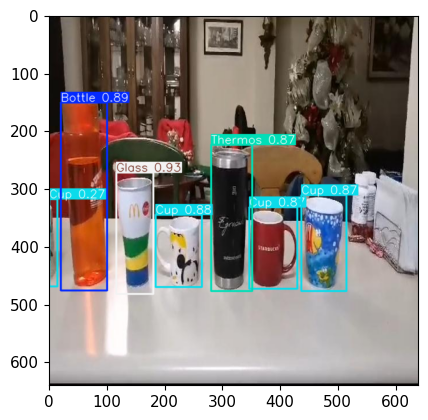

In [45]:
%matplotlib inline 
plt.imshow(np.squeeze(detect_results.render()))
plt.show()

In [46]:
detect_results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,116.134171,272.740234,180.910172,482.317993,0.930328,2,Glass
1,20.879585,151.931732,100.940010,476.781036,0.892794,0,Bottle
2,184.812546,345.584503,264.324341,470.339081,0.877242,1,Cup
3,436.324066,311.658936,514.308289,477.552490,0.874291,1,Cup
4,280.261169,224.544754,351.020813,477.533630,0.868082,3,Thermos
5,346.149353,332.302734,429.664795,473.434387,0.865196,1,Cup
6,0.000000,318.341644,14.336956,469.106537,0.270149,1,Cup


In [26]:
import pandas as pd

df = pd.read_csv('yolov5/runs/train/exp21/results.csv')

print(df) 

                   epoch        train/box_loss        train/obj_loss   
0                      0              0.098786              0.084038  \
1                      1              0.068960              0.079893   
2                      2              0.063451              0.070281   
3                      3              0.062689              0.065462   
4                      4              0.054271              0.063785   
5                      5              0.048546              0.058322   
6                      6              0.046494              0.060217   
7                      7              0.044193              0.054365   
8                      8              0.040223              0.058767   
9                      9              0.038256              0.055571   
10                    10              0.037062              0.052662   
11                    11              0.035575              0.052400   
12                    12              0.035065              0.05

In [36]:
from numpy import genfromtxt
results_metrics = genfromtxt('yolov5/runs/train/exp21/results.csv', delimiter=',')

#5 and 6 column - precision, recall
precision = results_metrics[1:,5]
recall = results_metrics[1:,6]

f1_score = 2*(precision*recall)/(precision+recall)

mean_f1_score = f1_score.mean()
print(f"F1 score: ", mean_f1_score)


F1 score:  0.7236615223471478
